### Data Science Job Salaries Dataset
Data science jobs are some of the fastest-growing, most in-demand in technology. Since 2012, Data Scientist roles have increased by 650 percent, and this rise shows no sign of stopping. The U.S. Bureau of Labor Statistics predicts that the demand for data science skills will increase another 27.9 percent by 2026. And, according to a report from McKinsey, that spells a shortage of between 140,000 and 190,000 people with analytical skills in the U.S. alone—not to mention another 1.5 million managers and analysts who will be required to understand how data analysis drives decision-making.

Data Scientist salaries have also risen with demand; Data Scientists can typically expect to make six figures. Demand also translates into an ability to relocate far more easily—from city to city, and even internationally.

### Feature Description
- work_year - The year the salary was paid
- experience_level - The experience level in the job during the year with the following possible values: 
    - EN Entry-level
    - Junior MI Mid-level
    - Intermediate SE Senior-level
    - Expert EX Executive-level
    - Director
- employment_type - The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
- job_title - The role worked in during the year
- salary - The total gross salary amount paid.
- salary_currency - The currency of the salary paid as an ISO 4217 currency code.
- salary_in_usd - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)
- employee_residence - Employee's primary country of residence in during the work year as an ISO 3166 country code
- remote_ratio - The overall amount of work done remotely, possible values are as follows:
    - 0 No remote work (less than 20%)
    - 50 Partially remote 
    - 100 Fully remote (more than 80%)
- company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code
- company_size - The average number of people that worked for the company during the year:
    - S less than 50 employees (small) 
    - M 50 to 250 employees (medium) 
    - L more than 250 employees (large)

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
data=pd.read_csv('ds_salaries.csv')

In [3]:
#viewing the first five data set
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
data.shape

(607, 11)

In [5]:
#data types of the attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [6]:
#statistical analysis of the data set
data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [7]:
#analysis of the categorical attributes
data.describe(include='object').T

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


In [8]:
#checking for missing data
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
#checking for duplicates
data.duplicated().sum()

42

In [10]:
#drop duplicates
data=data.drop_duplicates()

In [11]:
#recheck duplicates
data.duplicated().sum()

0

In [12]:
#renaming for easy understanding
data.experience_level.replace({'MI':'Junior Mid-level','SE':'Intermediate Senior-level',
                             'EN':'Entry-level','EX': 'Expert Executive-level'},inplace=True)
data.employment_type.replace({'PT':'PART TIME','FT':'FULL TIME','CT':'CONTRACT','FL':'FREELANCE'},inplace=True)

data.remote_ratio.replace({0:'NO REMOTE',50:'PARTIALLY REMOTE',100:'FULLY REMOTE'},inplace=True)

data.company_size.replace({'L':'LARGE','M':'MEDIUM','S':'SMALL'},inplace=True)

In [13]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Junior Mid-level,FULL TIME,Data Scientist,70000,EUR,79833,DE,NO REMOTE,DE,LARGE
1,2020,Intermediate Senior-level,FULL TIME,Machine Learning Scientist,260000,USD,260000,JP,NO REMOTE,JP,SMALL
2,2020,Intermediate Senior-level,FULL TIME,Big Data Engineer,85000,GBP,109024,GB,PARTIALLY REMOTE,GB,MEDIUM
3,2020,Junior Mid-level,FULL TIME,Product Data Analyst,20000,USD,20000,HN,NO REMOTE,HN,SMALL
4,2020,Intermediate Senior-level,FULL TIME,Machine Learning Engineer,150000,USD,150000,US,PARTIALLY REMOTE,US,LARGE


### Exploratory Data Analysis

### Univariate Analysis

Text(0.5, 1.0, 'Experience Level')

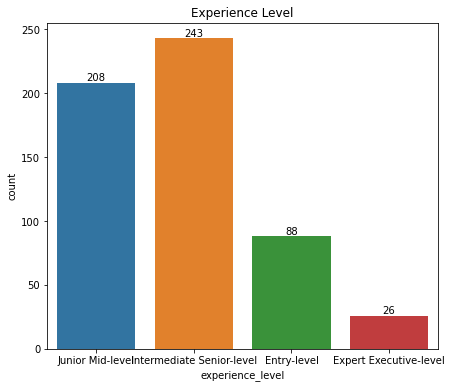

In [14]:
#analysis on experience level
plt.figure(figsize=(7,6))
ax=sns.countplot(x='experience_level',data=data)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Experience Level')


- From the plot,senior level is the most experienced level

Text(0.5, 0, 'jobs')

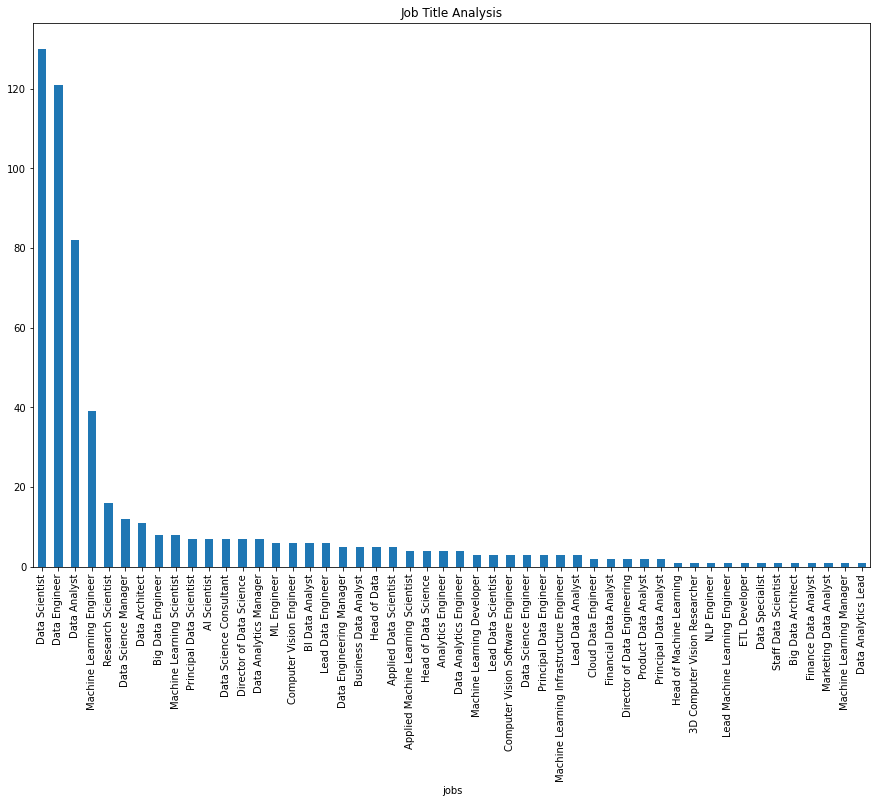

In [15]:
#Analysis on job title
data.job_title.value_counts().plot.bar(figsize=(15,10))
plt.title('Job Title Analysis')
plt.xlabel('jobs')

- Top three Jobs listed from the graph are data scientist,data engineer and data analyst.

Text(0.5, 1.0, 'Employment Types')

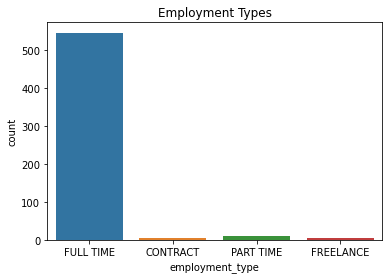

In [16]:
#Employment type
sns.countplot(x='employment_type',data=data)
plt.title('Employment Types')


- we have more full time workers than freelancers

Text(0.5, 1.0, 'Employees Residence')

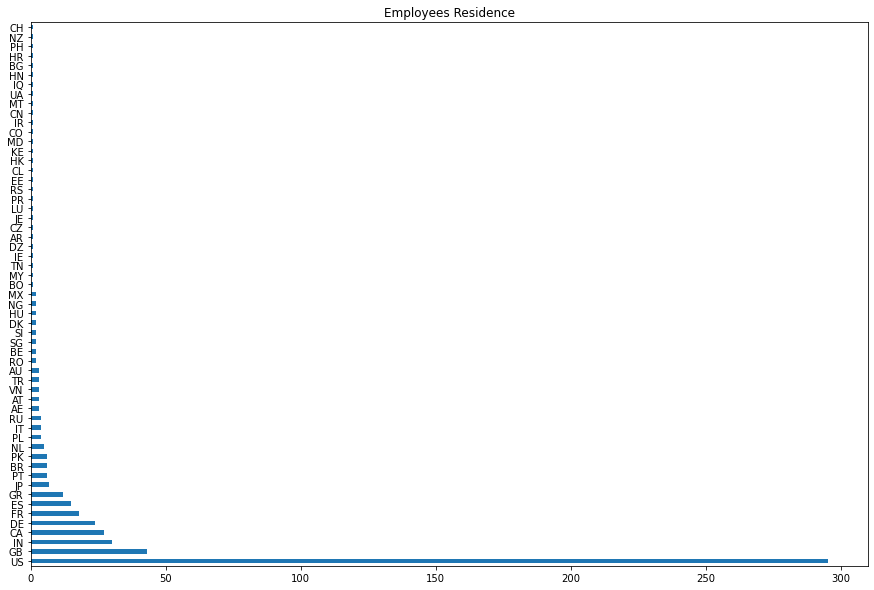

In [17]:
# analysis on employee's residence
data.employee_residence.value_counts().plot.barh(figsize=(15,10))
plt.title('Employees Residence')

- from our analysis,employee's reside more in the US

Text(0.5, 1.0, 'Company_location')

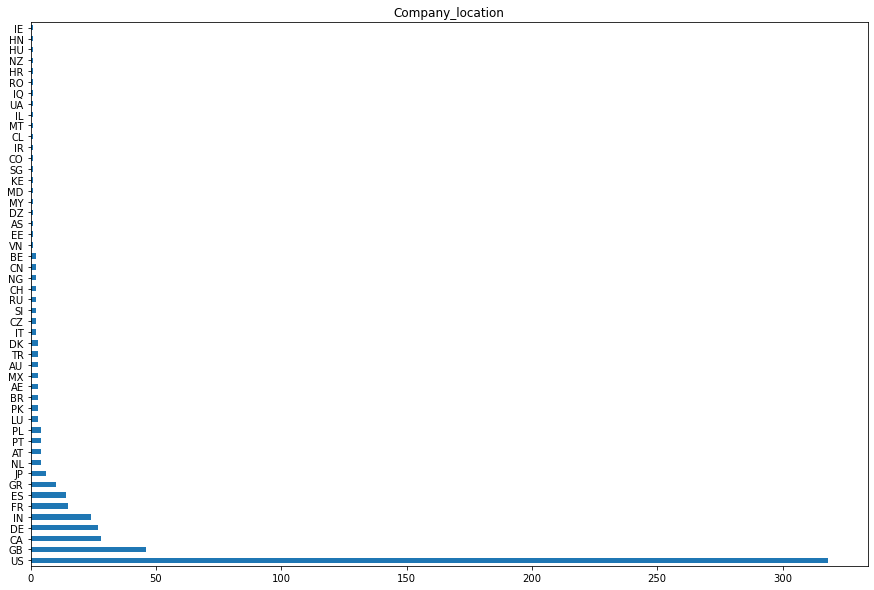

In [18]:
#location of the company
data.company_location.value_counts().plot.barh(figsize=(15,10))
plt.title('Company_location')

- companies location are more situated in the united states

Text(0.5, 1.0, 'Employee Residence based on Company Location')

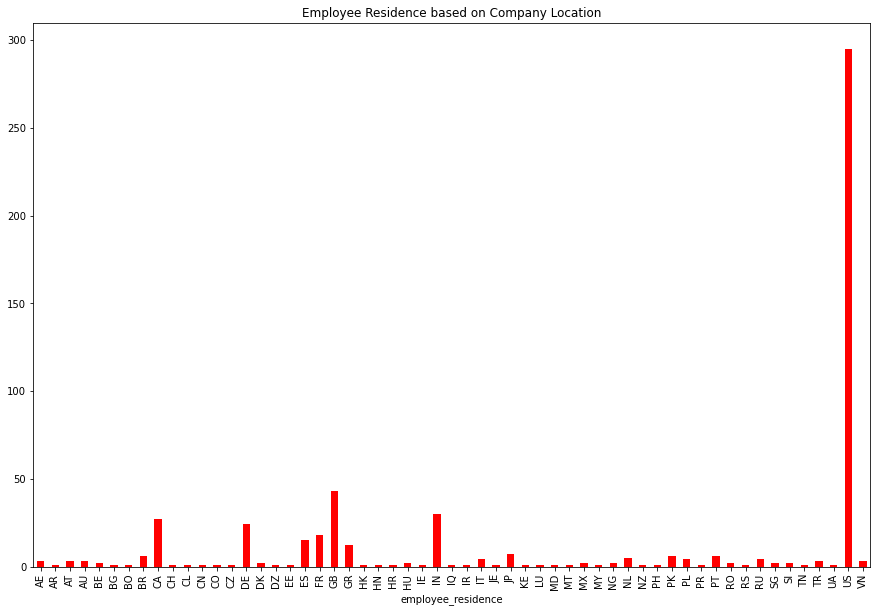

In [19]:
#Employee residence and company location
data.groupby('employee_residence')[['company_location']].count().plot.bar(figsize=(15,10),legend=False,color='r')
plt.title('Employee Residence based on Company Location')

- Top three company locations that employee resides in are US,GB and IN

Text(0.5, 1.0, 'Company_size')

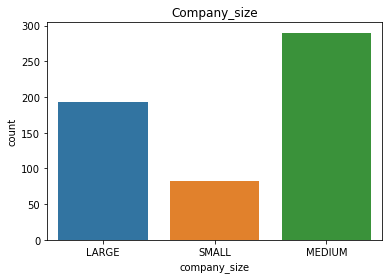

In [20]:
#company size
sns.countplot(x='company_size',data=data)
plt.title('Company_size')

- from the data set,most companies have a medium size of 50-250 employee's

Text(0.5, 1.0, 'Distribution of work year analysis')

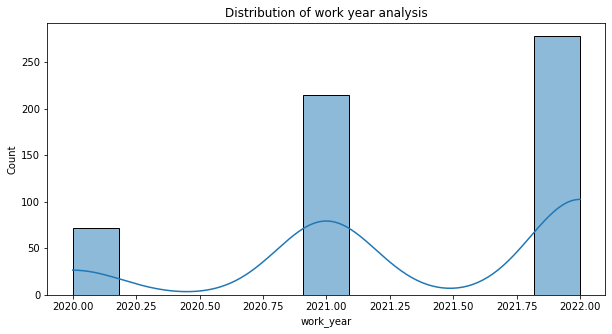

In [21]:
#work year analysis
plt.figure(figsize=(10,5))
sns.histplot(data.work_year,kde=True)
plt.title('Distribution of work year analysis')


- The KDE line shows the movement of salary paid per year. there's a huge increment in salary from 2020-2022

Text(0.5, 1.0, 'salary distribution in USD')

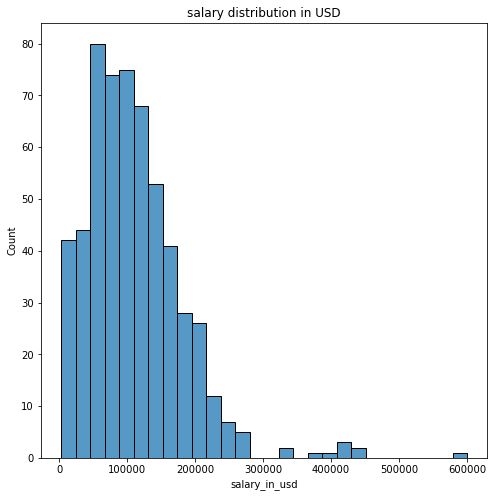

In [22]:
#salary in USD
plt.figure(figsize=(8,8))
sns.histplot(data=data,x='salary_in_usd')
plt.title('salary distribution in USD')


- The distribution of salary in usd is right skewed
-lots of data scientists salaries are from the range of 50,000 to 150,000 in usd
-few scientists earn more than 150,000 usd


Text(0.5, 1.0, 'Remote Ratio Analysis')

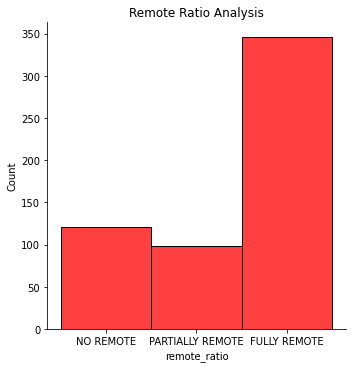

In [23]:
#Remote ratio analysis
sns.displot(data.remote_ratio,color='r')
plt.title('Remote Ratio Analysis')


- we have a high number of fully remote data scientist workers 

array([<AxesSubplot:ylabel='None'>], dtype=object)

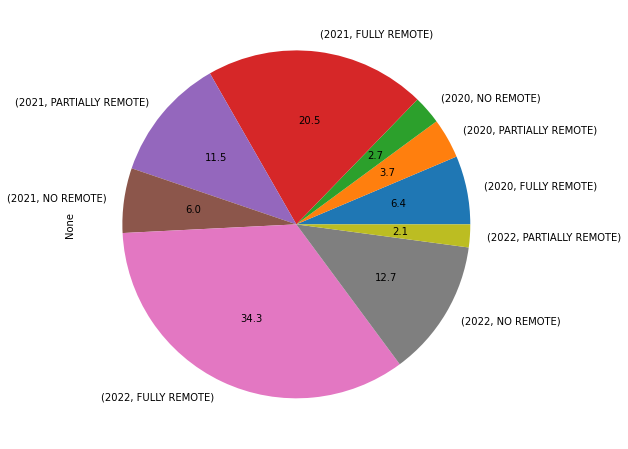

In [24]:
#Remote Ratio by Work Year
data.groupby('work_year')[['remote_ratio']].value_counts().plot(kind='pie',figsize=(8,8),
                                                            subplots=True,legend=False,autopct='%.1f')

- fully remote jobs increased from 6.4% to 34.3 percent.
- partially remote jobs increased from 2020-2021 and then decreased in 2022


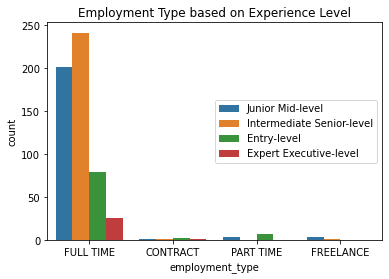

In [25]:
#employment type by expereince level
sns.countplot(x='employment_type',data=data,hue='experience_level')
plt.title('Employment Type based on Experience Level')
plt.legend(loc='right')

- There are more full time workers in senior level and junior mid level
- An entry level  data scientist can work part time or contract
- There are no part time workers in intermediate senior level

In [26]:
pd.crosstab(data.employment_type,data.experience_level)

experience_level,Entry-level,Expert Executive-level,Intermediate Senior-level,Junior Mid-level
employment_type,,,,
CONTRACT,2,1,1,1
FREELANCE,0,0,1,3
FULL TIME,79,25,241,201
PART TIME,7,0,0,3


In [27]:
#Top three job titles by experience level
data.groupby('job_title')[['experience_level']].count().sort_values(by='experience_level',ascending=False).nlargest(3,'experience_level')

,experience_level
job_title,
Data Scientist,130
Data Engineer,121
Data Analyst,82


- Top three job titles are Data Scientist, Data Engineer and Data Analyst

<AxesSubplot:xlabel='company_size', ylabel='count'>

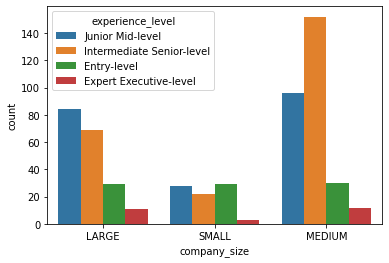

In [28]:
#company size by experience level
sns.countplot(x='company_size',data=data,hue='experience_level')

* Medium-sized companies have the highest number of data scientists over all experience levels.
* Majority of the data professionals in Medium sized companies are Senior-level, followed by Junior Mid level .


Text(0.5, 1.0, 'Company location by experience level')

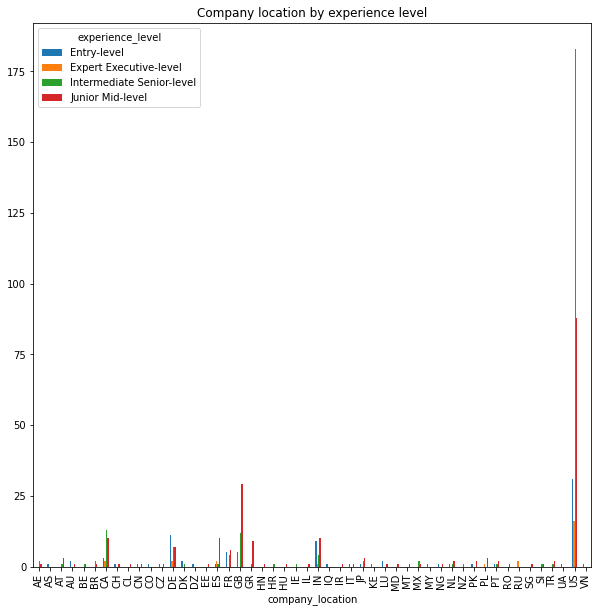

In [29]:
#company location by experience level
pd.crosstab(data.company_location,data.experience_level).plot.bar(figsize=(10,10))
plt.title('Company location by experience level')

- Intermediate senior levels are more in the US
- we have more junior mid level  in GB than other experience levels

Text(0.5, 1.0, 'Salary by Work Year')

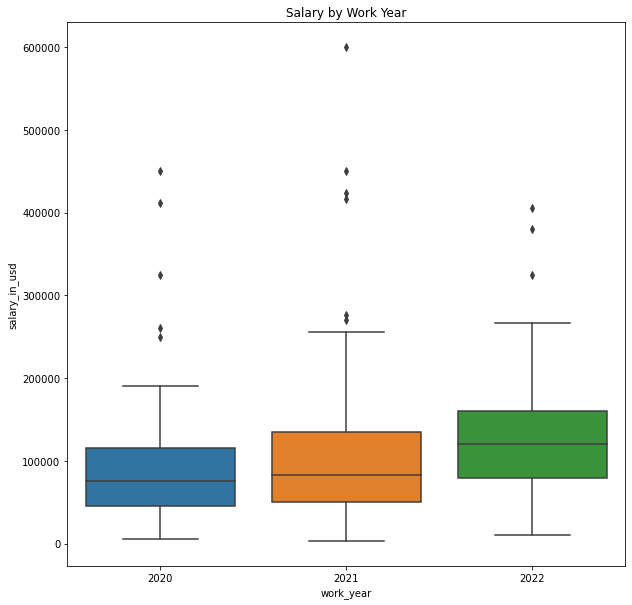

In [30]:
#Salary by Work year
plt.figure(figsize=(10,10))
sns.boxplot(x=data.work_year, y=data.salary_in_usd)
plt.title('Salary by Work Year')

- There's an increment of salary from 2021 - 2022

Text(0.5, 1.0, 'Salary by Experience Level')

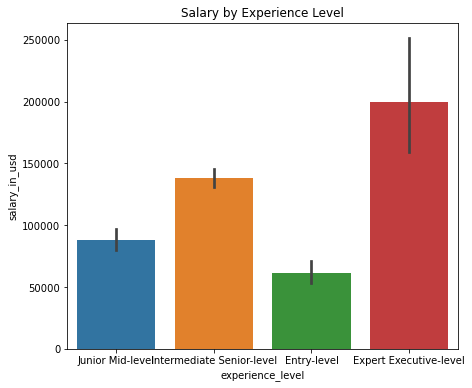

In [31]:
#Salary by experience level
plt.figure(figsize=(7,6))
sns.barplot(data=data, x='experience_level',y='salary_in_usd')
plt.title('Salary by Experience Level')

Text(0.5, 1.0, 'Salary by Company Size')

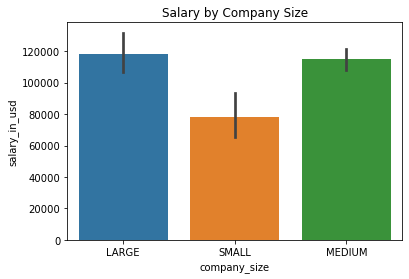

In [32]:
#salary by company size
sns.barplot(data=data,x='company_size',y='salary_in_usd')
plt.title('Salary by Company Size')

- salaries paid in large companies are higher than that of small and medium company

Text(0.5, 1.0, 'Highest salaries by Job Title')

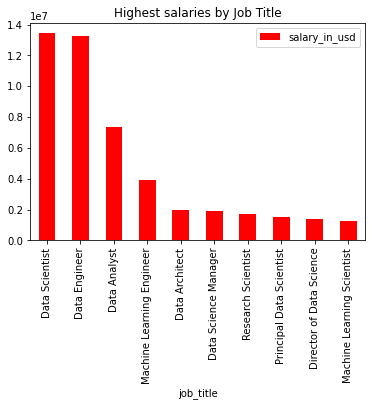

In [33]:
#hhighest salaries based on job title
data.groupby('job_title')[['salary_in_usd']].sum().sort_values(by='salary_in_usd',ascending=False).nlargest(10,'salary_in_usd').plot.bar(color='r')
plt.title('Highest salaries by Job Title')

- Data scientists, Engineers and Analyst earn more 

Text(0.5, 1.0, 'Salary based on company location')

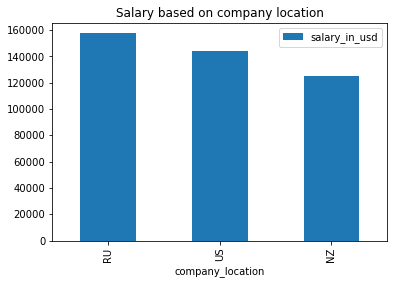

In [34]:
#Average salary by company location
data.groupby('company_location')[['salary_in_usd']].mean().sort_values(by='salary_in_usd',ascending=False).nlargest(3,'salary_in_usd').plot.bar()
plt.title('Salary based on company location')

- Russia has the highest Average Salary in usd followed by United states

### SUMMARY
- Most countries needs data scientist to use historical data in taking decisions
- As an entry level scientist it is safer to start with a medium sized company
- The number of data scientist jobs and salary are increasing 
- Most data scientist jobs are full time jobs